**Regular K-Means Clustering**

In [1]:
import tensorflow as tf
from tensorflow import keras
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, confusion_matrix
from keras.datasets import mnist
import numpy as np
import sklearn.metrics as metrics

# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

Using TensorFlow backend.


x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [2]:
# preprocessing the training images

# convert each image to 1 dimensional array
X = x_train.reshape(len(x_train),-1)
Y = y_train

# normalize the data to 0 - 1
X = X.astype(float) / 255.

print(X.shape)
print(X[0].shape)

(60000, 784)
(784,)


In [5]:
# preprocessing the testing images

# convert each image to 1 dimensional array
x_test = x_test.reshape(len(x_test),-1)
x_test = x_test.astype(float) /255.

print(x_test.shape)
print(x_test[0].shape)

(10000, 784)
(784,)


In [6]:
# Training the model
from sklearn.cluster import KMeans

n_labels = len(np.unique(y_test))
print(n_labels)

# Initialize KMeans model
kmeans = KMeans(n_clusters = n_labels)

# Fit the model to the training data
kmeans.fit(X)

10


KMeans(algorithm='auto', copy_x=True, init='k-means++', max_iter=300,
       n_clusters=10, n_init=10, n_jobs=None, precompute_distances='auto',
       random_state=None, tol=0.0001, verbose=0)

In [11]:
from sklearn.metrics import confusion_matrix
import sklearn.metrics as metrics

predictions = kmeans.predict(x_test)
cm = confusion_matrix(y_test, predictions)
print("Confusion matrix is\n", cm)
print('Accuracy: {}\n'.format(metrics.normalized_mutual_info_score(y_test, predictions)))

Confusion matrix is
 [[268   7  36   0 588  66  24   1   5   5]
 [ 30  11   2   0  49  19 889   0   0   0]
 [326 289 313   0  14  48   4   0   2   4]
 [135  12   3   0 281  74 490   0   2   3]
 [132 510 188   0 102  36  25   0   2   5]
 [  8   0   0  79   0 690   0 220   3   0]
 [356 194 144   0 185  97  11   0  13   0]
 [  0   0   0  50   0  84   0 865   1   0]
 [ 56   7  61   0   3  69   4  48 348 404]
 [  7   1   1 844   0  36   0 107   2   2]]
Accuracy: 0.514145389900235



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


**Auto-Encoder based K-Means clustering**

In [12]:
# Load the fashion-mnist pre-shuffled train data and test data
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

print("x_train shape:", x_train.shape, "y_train shape:", y_train.shape)

x_train shape: (60000, 28, 28) y_train shape: (60000,)


In [13]:
# Reshape and Rescale the images

x_train = x_train.astype('float32')/255.
x_test = x_test.astype('float32')/255.

x_train = x_train.reshape((len(x_train),np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test),np.prod(x_test.shape[1:])))

print(x_train.shape)
print(x_test.shape)

(60000, 784)
(10000, 784)


In [17]:
import keras
from keras.models import Sequential
from keras.layers import Input, Dense, Dropout, Conv2D, MaxPool2D, UpSampling2D, Activation
from keras import backend as K
from sklearn.cluster import KMeans
from sklearn.metrics import confusion_matrix
from keras import regularizers
from keras.models import Model

# Build the autoencoder

encoding_dim = 32
input_img = Input(shape=(784,))
encoded = Dense(encoding_dim,activation='selu',kernel_regularizer=regularizers.l2(0.01))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)
autoencoder = Model(input_img,decoded)
encoder = Model(input_img,encoded)
encoded_input = Input(shape=(encoding_dim,))
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))
autoencoder.compile(optimizer='adam', loss='binary_crossentropy')
autoencoder.fit(x_train,x_train, epochs=60, batch_size=2056, shuffle=True, validation_data=(x_test,x_test))
autoencoder.summary()
encoded_images = encoder.predict(x_test)






Train on 60000 samples, validate on 10000 samples
Epoch 1/60





60000/60000 [==============================] - 3s 48us/step - loss: 1.0169 - val_loss: 0.7437
Epoch 2/60
60000/60000 [==============================] - 3s 43us/step - loss: 0.6273 - val_loss: 0.5390
Epoch 3/60
60000/60000 [==============================] - 3s 42us/step - loss: 0.5001 - val_loss: 0.4691
Epoch 4/60
60000/60000 [==============================] - 2s 41us/step - loss: 0.4518 - val_loss: 0.4382
Epoch 5/60
60000/60000 [==============================] - 3s 45us/step - loss: 0.4290 - val_loss: 0.4223
Epoch 6/60
60000/60000 [==============================] - 2s 42us/step - loss: 0.4160 - val_loss: 0.4117
Epoch 7/60
60000/60000 [==============================] - 2s 42us/step - loss: 0.4065 - val_loss: 0.4033
Epoch 8/60
60000/60000 [==============================] - 3s 42us/step - loss: 0.3987 - val_loss: 0.3964
Epoch 9/60
60000/60000 [==============================] - 3s 43us/step - loss: 0.3922 - val_loss: 0.

In [18]:
kmeans = KMeans(n_clusters=10)
kmeans.fit(encoded_images)
predicted_labels = kmeans.predict(encoded_images)

cm = confusion_matrix(y_test, predicted_labels)
print("CM",cm)
print('Accuracy: {}\n'.format(metrics.normalized_mutual_info_score(y_test, predicted_labels)))

CM [[  7   2 286   0 618  26   6   2   3  50]
 [  8   0  38   0  51 897   1   1   0   4]
 [360   0 306   0  15   3   6   4   3 303]
 [ 13   0 198   0 263 519   2   1   1   3]
 [582   0 141   0 108  26   2   0   5 136]
 [  0 523   8  54   0   0   3 412   0   0]
 [243   1 376   0 196  12  14  13   2 143]
 [  0 920   0  65   0   0   0  15   0   0]
 [  7  40  93   2   3   4 359  37 390  65]
 [  2  81   5 839   4   0   2  64   1   2]]
Accuracy: 0.5390553926322948



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)


Epoch 1/4
60000/60000 [==============================] - 5s 78us/step - loss: 0.3230
Epoch 2/4
60000/60000 [==============================] - 5s 75us/step - loss: 0.3178
Epoch 3/4
60000/60000 [==============================] - 5s 77us/step - loss: 0.3145
Epoch 4/4
60000/60000 [==============================] - 5s 84us/step - loss: 0.3116


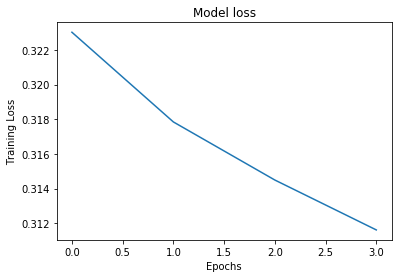

In [19]:
import matplotlib.pyplot as plt
%matplotlib inline

# Train the model
history = autoencoder.fit(x_train, x_train, epochs=4, batch_size=64, verbose=1)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Training Loss')
plt.xlabel('Epochs')
plt.show()

Epoch 1/4
10000/10000 [==============================] - 1s 77us/step - loss: 0.3123
Epoch 2/4
10000/10000 [==============================] - 1s 76us/step - loss: 0.3121
Epoch 3/4
10000/10000 [==============================] - 1s 76us/step - loss: 0.3113
Epoch 4/4
10000/10000 [==============================] - 1s 77us/step - loss: 0.3111


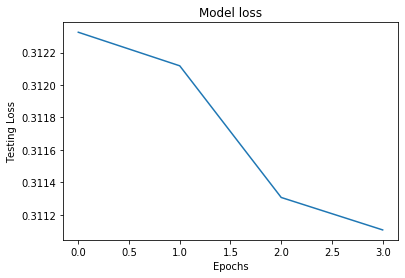

In [20]:
# Train the model
history = autoencoder.fit(x_test, x_test, epochs=4, batch_size=64, verbose=1)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Testing Loss')
plt.xlabel('Epochs')
plt.show()

Epoch 1/4
10000/10000 [==============================] - 1s 75us/step - loss: 0.3105
Epoch 2/4
10000/10000 [==============================] - 1s 76us/step - loss: 0.3103
Epoch 3/4
10000/10000 [==============================] - 1s 74us/step - loss: 0.3101
Epoch 4/4
10000/10000 [==============================] - 1s 77us/step - loss: 0.3098


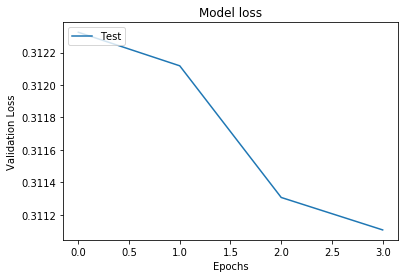

In [22]:
import matplotlib.pyplot as plt
%matplotlib inline


history_validation = autoencoder.fit(x_test, x_test, epochs=4, batch_size=64, verbose=1)

# summarize history for loss
plt.plot(history.history['loss'])
plt.title('Model loss')
plt.ylabel('Validation Loss')
plt.xlabel('Epochs')
plt.legend(['Test'], loc='upper left')
plt.show()

**Auto-encoder with Gaussian mixture model clustering**

In [23]:
!pip install gmm_mml

In [24]:
from keras.layers import Input, Dense
from keras.models import Model
from keras import regularizers
from keras.datasets import mnist
import numpy as np
import pandas as pd
from gmm_mml import GmmMml
from keras.callbacks import TensorBoard
import tensorflow as tf

(x_train, y_train), (x_test, y_test) = tf.keras.datasets.fashion_mnist.load_data()

x_train = x_train.astype('float32') / 255.
x_test = x_test.astype('float32') / 255.

x_train = x_train.reshape((len(x_train), np.prod(x_train.shape[1:])))
x_test = x_test.reshape((len(x_test), np.prod(x_test.shape[1:])))

# this is the size of our encoded representations
encoding_dim = 32
# this is our input placeholder
input_img = Input(shape=(784,))

encoded = Dense(encoding_dim,activation='selu',kernel_regularizer=regularizers.l2(0.01))(input_img)
decoded = Dense(784, activation='sigmoid')(encoded)

# this model maps an input to its reconstruction
autoencoder = Model(input_img,decoded)

# this model maps an input to its encoded representation
encoder = Model(input_img,encoded)

# create a placeholder for an encoded (32-dimensional) input
encoded_input = Input(shape=(encoding_dim,))

# retrieve the last layer of the autoencoder model
decoder_layer = autoencoder.layers[-1]
decoder = Model(encoded_input, decoder_layer(encoded_input))

autoencoder.compile(optimizer='adam', loss='binary_crossentropy')

autoencoder.fit(x_train,x_train, epochs=60, batch_size=2056, shuffle=True, validation_data=(x_test,x_test))
autoencoder.summary()

Train on 60000 samples, validate on 10000 samples
Epoch 1/60
60000/60000 [==============================] - 3s 46us/step - loss: 1.0081 - val_loss: 0.7394
Epoch 2/60
60000/60000 [==============================] - 3s 43us/step - loss: 0.6240 - val_loss: 0.5358
Epoch 3/60
60000/60000 [==============================] - 3s 42us/step - loss: 0.4960 - val_loss: 0.4647
Epoch 4/60
60000/60000 [==============================] - 3s 42us/step - loss: 0.4485 - val_loss: 0.4363
Epoch 5/60
60000/60000 [==============================] - 2s 42us/step - loss: 0.4281 - val_loss: 0.4222
Epoch 6/60
60000/60000 [==============================] - 3s 42us/step - loss: 0.4165 - val_loss: 0.4128
Epoch 7/60
60000/60000 [==============================] - 2s 42us/step - loss: 0.4079 - val_loss: 0.4051
Epoch 8/60
60000/60000 [==============================] - 3s 42us/step - loss: 0.4006 - val_loss: 0.3983
Epoch 9/60
60000/60000 [==============================] - 3s 42us/step - loss: 0.3942 - val_loss: 0.3925
Epoch

In [26]:
from sklearn.metrics import confusion_matrix

# encode and decode some digits
# note that we take them from the *test* set
encoded_images = encoder.predict(x_test)

clf=GmmMml()
clf.fit(encoded_images)
cm = confusion_matrix(y_test, clf.predict(encoded_images))
print("Confusion matrix is\n",cm)

print('Accuracy: {}\n'.format(metrics.normalized_mutual_info_score(y_test, clf.predict(encoded_images))))

Confusion matrix is
 [[ 36 121   0   0 843   0   0   0   0   0]
 [ 16   3 830   0 151   0   0   0   0   0]
 [840 104   0   0  56   0   0   0   0   0]
 [ 56  15   7   0 922   0   0   0   0   0]
 [817  37   0   0 146   0   0   0   0   0]
 [  0 368   0 632   0   0   0   0   0   0]
 [536 127   0   0 337   0   0   0   0   0]
 [  0  12   0 988   0   0   0   0   0   0]
 [  9 958   0  11  22   0   0   0   0   0]
 [  0 548   0 452   0   0   0   0   0   0]]
Accuracy: 0.5537791537659947



/usr/local/lib/python3.6/dist-packages/sklearn/metrics/cluster/supervised.py:859: FutureWarning: The behavior of NMI will change in version 0.22. To match the behavior of 'v_measure_score', NMI will use average_method='arithmetic' by default.
  FutureWarning)
